In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import json
import matplotlib.pyplot as plt
import scipy.stats as stats

# Always make it pretty.
plt.style.use('ggplot')

In [2]:
movies_df = pd.read_csv("IMDb_datasets/movies.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (8,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
movies_df.head()

,Unnamed: 0,titleId,title_ordering,title,region,language,types,attributes,isOriginalTitle,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,0,tt0004272,1,"Lucille Love, la chica misteriosa",VE,\N,\N,\N,0,movie,Lucille Love: The Girl of Mystery,Lucille Love: The Girl of Mystery,0,1914,\N,300,Action,5.8,9
1,1,tt0004272,2,Lucille Love: The Girl of Mystery,US,\N,\N,\N,0,movie,Lucille Love: The Girl of Mystery,Lucille Love: The Girl of Mystery,0,1914,\N,300,Action,5.8,9
2,2,tt0004272,3,Lucille Love: The Girl of Mystery,\N,\N,original,\N,1,movie,Lucille Love: The Girl of Mystery,Lucille Love: The Girl of Mystery,0,1914,\N,300,Action,5.8,9
3,3,tt0004336,1,El misterio del millón de dólares,ES,\N,\N,\N,0,movie,The Million Dollar Mystery,The Million Dollar Mystery,0,1914,\N,\N,"Adventure,Mystery",5.5,21
4,4,tt0004336,2,The Million Dollar Mystery,\N,\N,original,\N,1,movie,The Million Dollar Mystery,The Million Dollar Mystery,0,1914,\N,\N,"Adventure,Mystery",5.5,21


In [5]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219539 entries, 0 to 1219538
Data columns (total 19 columns):
Unnamed: 0         1219539 non-null int64
titleId            1219539 non-null object
title_ordering     1219539 non-null int64
title              1219539 non-null object
region             1219535 non-null object
language           1219539 non-null object
types              1219539 non-null object
attributes         1219539 non-null object
isOriginalTitle    1219539 non-null object
titleType          1219539 non-null object
primaryTitle       1219539 non-null object
originalTitle      1219539 non-null object
isAdult            1219539 non-null int64
startYear          1219539 non-null object
endYear            1219539 non-null object
runtimeMinutes     1219539 non-null object
genres             1219539 non-null object
averageRating      1219539 non-null float64
numVotes           1219539 non-null int64
dtypes: float64(1), int64(4), object(14)
memory usage: 176.8+ MB


In [86]:
movies_df_copy = movies_df.filter(['titleId','startYear','averageRating'], axis=1)
averageRating_overyear = movies_df_copy.drop_duplicates(subset=['titleId'],keep='first').dropna()

In [87]:
averageRating_overyear.head()

,titleId,startYear,averageRating
0,tt0004272,1914,5.8
3,tt0004336,1914,5.5
6,tt0005209,1915,5.7
7,tt0006204,1916,6.2
8,tt0006489,1916,5.3


In [92]:
averageRating_overyear['startYear'] = averageRating_overyear['startYear'].astype(str)

In [94]:
averageRating_overyear.to_csv("IMDb_datasets/averageRating_overyear.csv")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9c8c3c3630>]],
      dtype=object)

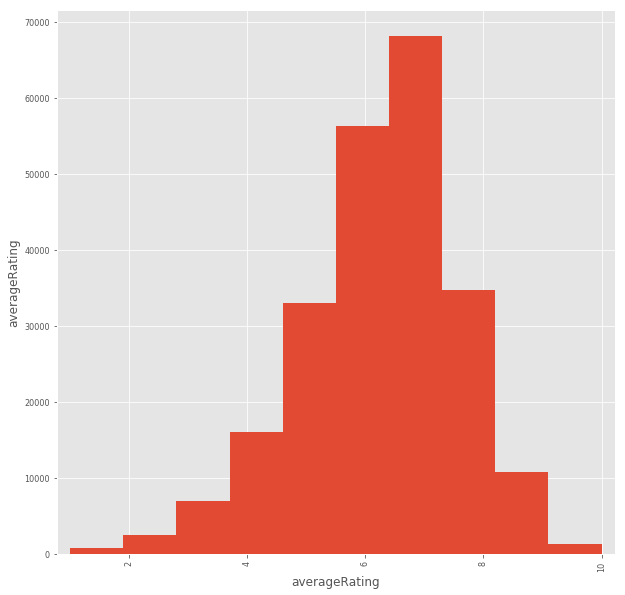

In [90]:
pd.plotting.scatter_matrix(averageRating_overyear, figsize=(10, 10), s=100)

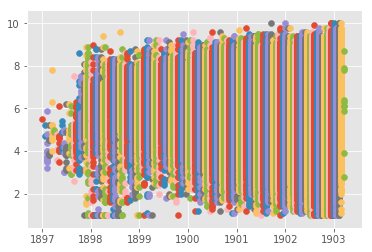

In [95]:
# def get_avgrating_column(df):
#     return averageRating_overyear['averageRating']

year_groups = averageRating_overyear.groupby('startYear')

fig, ax = plt.subplots()

keys = []
for i, (key, group) in enumerate(year_groups):
    ax.scatter([i]*len(group), group['averageRating'])
    keys.append(key)

ax.set_xticklabels(keys)

plt.show()

In [7]:
movies_crew_df = pd.read_csv("IMDb_datasets/movies_crew.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
movies_crew_df.head()

,Unnamed: 0,titleId,title_ordering,title,region,language,titleType,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers
0,0,tt0004272,1,"Lucille Love, la chica misteriosa",VE,\N,movie,0,1914,\N,300,Action,5.8,9,nm0285643,"nm0192062,nm0285643"
1,1,tt0004272,2,Lucille Love: The Girl of Mystery,US,\N,movie,0,1914,\N,300,Action,5.8,9,nm0285643,"nm0192062,nm0285643"
2,2,tt0004272,3,Lucille Love: The Girl of Mystery,\N,\N,movie,0,1914,\N,300,Action,5.8,9,nm0285643,"nm0192062,nm0285643"
3,3,tt0004336,1,El misterio del millón de dólares,ES,\N,movie,0,1914,\N,\N,"Adventure,Mystery",5.5,21,nm0360617,"nm0518840,nm0569805"
4,4,tt0004336,2,The Million Dollar Mystery,\N,\N,movie,0,1914,\N,\N,"Adventure,Mystery",5.5,21,nm0360617,"nm0518840,nm0569805"


In [ ]:
casts_df = pd.read_csv("IMDb_datasets/1.csv", sep='\t')

In [1]:
casts_df.head()

NameError: name 'casts_df' is not defined

In [ ]:
name_basics_path = 'IMDb_datasets/name.basics.tsv'
title_principals_path = 'IMDb_datasets/title.principals.tsv'

name_basics_df = pd.read_csv(name_basics_path, sep='\t')
title_principals_df = pd.read_csv(title_principals_path, sep='\t')